<a href="https://colab.research.google.com/github/Ramkanc/Student_AI_ML/blob/main/Capstone1_RamK_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python==4.8.0.76

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially.

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [4]:
# Import Libraries
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchsummary import summary
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import pandas as pd

In [5]:
import PIL
from PIL import Image

In [6]:
import cv2

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)

100%|██████████| 1.04G/1.04G [00:06<00:00, 173MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1


In [9]:
found_directories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
found_files =[f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
print (found_directories)
print (found_files)

['Images']
['captions.txt']


In [10]:
img_folder_path = os.path.join(path, found_directories[0])
print(img_folder_path)

/root/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1/Images


In [ ]:
try:
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    print(f"Number of files in the dataset: {num_files}")
    for f in os.listdir(path):
      image_path = os.path.join(path, f)
      with Image.open(image_path) as img:
            width, height = img.size  # Get image dimensions
            print(f"{f} Image Size: {width} x {height}")  # Print the size


except FileNotFoundError:
    print(f"Error: Directory not found at '{path}'. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

Streaming output truncated to the last 5000 lines.
2192411521_9c7e488c5e.jpg Image Size: 400 x 500
975131015_9acd25db9c.jpg Image Size: 500 x 333
2287887341_663bfa15af.jpg Image Size: 500 x 375
3054200086_657d4398e8.jpg Image Size: 500 x 371
3249891130_b241591e89.jpg Image Size: 333 x 500
2396100671_3a9d67f03d.jpg Image Size: 500 x 333
2883099128_0b056eed9e.jpg Image Size: 500 x 334
3373481779_511937e09d.jpg Image Size: 500 x 362
3713324467_104d72f7db.jpg Image Size: 500 x 405
493542985_c85ad29ebe.jpg Image Size: 494 x 500
3522025527_c10e6ebd26.jpg Image Size: 500 x 371
246231741_882b45c4e1.jpg Image Size: 500 x 375
3246991821_750a3097e2.jpg Image Size: 500 x 333
3019917636_4e0bb0acc4.jpg Image Size: 332 x 500
3462165890_c13ce13eff.jpg Image Size: 500 x 375
3490044563_8eb551ef59.jpg Image Size: 500 x 375
3510218982_318f738b76.jpg Image Size: 500 x 332
2775249812_f4db95e818.jpg Image Size: 500 x 350
2314732154_83bc7f7314.jpg Image Size: 500 x 322
2266144051_614b2d62b0.jpg Image Size: 50

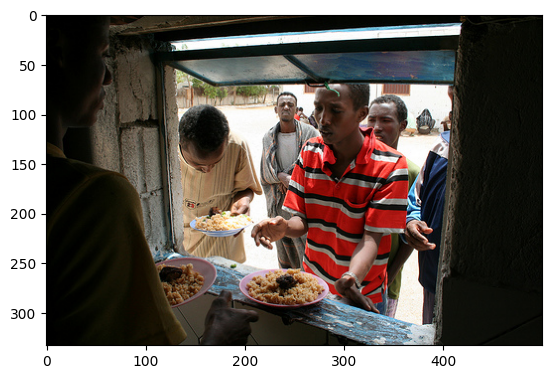

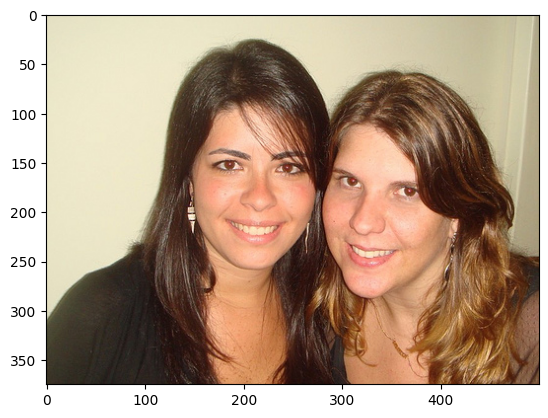

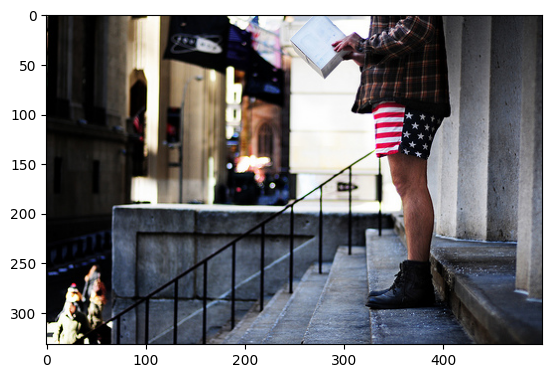

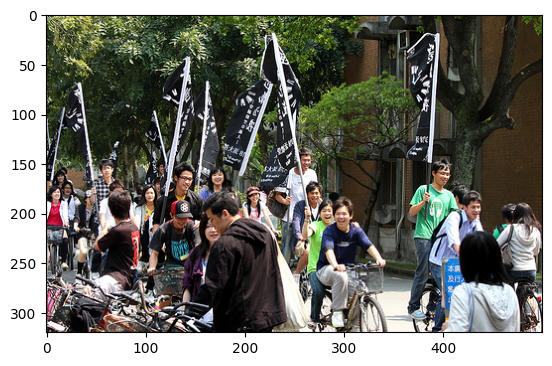

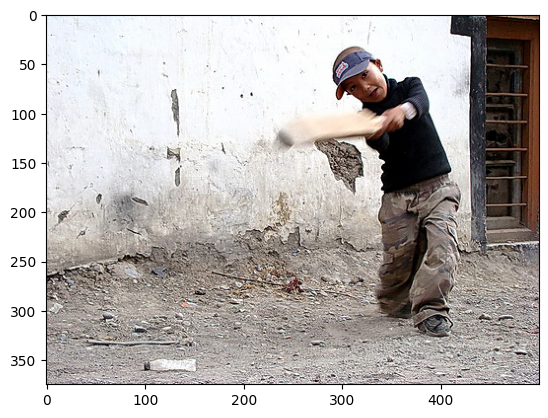

In [ ]:
image_count = 0  # Initialize the count

for f in os.listdir(path):
      if image_count >=5:
        break;
      image_path = os.path.join(path, f)
      img = cv2.imread(image_path)
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.imshow(img_rgb)
      image_count += 1
      plt.show()


In [ ]:
def process_image(image_path):
    """
    Process an image by resizing, reshaping, and normalizing.

    Args:
    - image_path (str): Path to the input image.

    Returns:
    - np.ndarray: Processed image with shape (3, 224, 224) and normalized pixel values.
    """
    # Step 1: Read the image
    image = cv2.imread(image_path)  # Read the image in BGR format
    if image is None:
        raise ValueError(f"Could not read the image from {image_path}")

    # Step 2: Resize the image to 224x224
    resized_image = cv2.resize(image, (224, 224))

    # Step 3: Reshape the image to 3x224x224 (channels first format)
    reshaped_image = np.transpose(resized_image, (2, 0, 1))  # Change from HWC to CHW format

    # Step 4: Normalize the image (scale pixel values to the range [0, 1])
    normalized_image = reshaped_image / 255.0  # Convert pixel values to [0, 1]

    return normalized_image

In [ ]:
# prompt: provide code by using CV2 for below actions 1) to resize images to 224X224 size 2) reshape images to 3X224X224 3) normlize the images


def preprocess_image(image_path):
    try:
        # 1. Resize image to 224x224
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))

        # 2. Reshape image to 3x224x224
        img = img.reshape(3,224,224)


        # 3. Normalize the image (example: divide by 255)
        img = img / 255.0

        return img
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Example usage (assuming 'path' is defined as in your original code):
path = '/root/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1/Images'

image_count = 0
for f in os.listdir(path):
    if image_count >= 5:
        break

    image_path = os.path.join(path, f)
    processed_img = preprocess_image(image_path)

    if processed_img is not None:
        print(f"Processed image shape: {processed_img.shape}")
        # You can further process or display the image here

        # Example: Displaying the image (if it's still in a format matplotlib understands)
        # You might need to reshape back to (224, 224, 3) depending on how cv2 processed it
        # plt.imshow(processed_img.transpose(1,2,0)) # Assuming it's a numpy array with channels first
        # plt.show()

    image_count += 1